In [1]:
!gpu-who

/bin/bash: gpu-who: command not found


In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from import_for_notebooks import *
torch.set_default_dtype(torch.float64)

import common_utils
import analysis
import analysis_utils
from analysis import find_nearest_neighbour, scale, sort_by_metric

IMPORTANT IMPORTED! 2024-11-04 08:48:52.401149
device=cuda:0


In [2]:
# in case you have your own sweep:
# sweep_id = 'uvl74ek9'
# sweeps_dir = './data/sweeps/'
# sweep = analysis_utils.read_sweep(sweeps_dir, sweep_id, name=None, problem='mnist_odd_even')
# analysis_utils.download_sweep_results_from_wandb(sweep, max_runs_to_download=100)
# X = analysis_utils.get_all_reconstruction_outputs(sweep, verbose=True)

# read sweep parameters
sweep = common_utils.common.load_dict_to_obj("./reconstructions/mnist_odd_even/sweep.txt")
# read model, data, and whatever needed
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(sweep, put_in_sweep=True, run_train_test=True)

OUTPUT_DIR: /home/da23c014/PrivacyAI/CourseProject/dataset_reconstruction/runs/2024_11_04_08_48_52_327845_mnist_odd_even_d250
Namespace(cuda=True, data_per_class_test=1000, data_per_class_train=250, data_per_class_val=0, data_reduce_mean=True, datasets_dir='/home/da23c014/PrivacyAI/CourseProject/datasets', device=device(type='cuda', index=0), extract_save_results=True, extract_save_results_every=10000, extraction_data_amount_per_class=500, extraction_epochs=50000, extraction_evaluate_rate=1000, extraction_init_scale=1e-09, extraction_lambda_lr=0.0001, extraction_loss_type='kkt', extraction_lr=0.0001, extraction_lr_l=0.0001, extraction_lr_x=0.0001, extraction_min_lambda=0.05, extraction_model_activation='modifiedrelu', extraction_model_relu_alpha=300, extraction_stop_threshold=5000, model_hidden_list=[1000, 1000], model_init_list=[0.001, 0.001], model_name='mnist_odd_even_d250', model_train_activation='relu', model_type='mlp', model_use_bias=False, output_dir='/home/da23c014/PrivacyAI/C

FileNotFoundError: [Errno 2] No such file or directory: 'CourseProject/dataset_reconstruction/wandb/run-20241103_163954-2n6ozig4/files/weights-mnist_odd_even_d250_mnist_odd_even.pth'

In [6]:
# Read Reconstructed Data:

# "X" will contain a batch of all reconstructed samples (not all of them are good.. for this we need the rest of the cell)
# Here we put reconstructed data from two diffferent runs.
# you can use both of them or just one. (uncomment relevant parts)
x_paths = [
    './reconstructions/mnist_odd_even/kcf9bhbi_x.pth',
    './reconstructions/mnist_odd_even/rbijxft7_x.pth',
    '/home/da23c014/PrivacyAI/CourseProject/dataset_reconstruction/wandb/run-20241028_170759-r3yp1a1y/files/x/49000_x.pth'

]
# X = torch.load(x_paths[0])
# X = torch.load(x_paths[1])
X = torch.cat([torch.load(x_paths[0]), torch.load(x_paths[1])])

In [22]:
# Read Reconstructed Data:

# "X" will contain a batch of all reconstructed samples (not all of them are good.. for this we need the rest of the cell)
# Here we put reconstructed data from two diffferent runs.
# you can use both of them or just one. (uncomment relevant parts)
'''
x_paths = [
    './reconstructions/mnist_odd_even/kcf9bhbi_x.pth',
    './reconstructions/mnist_odd_even/rbijxft7_x.pth'
]
'''
x_paths = ['./runs/2024_10_13_01_45_03_208802_mnist_odd_even_d250/x/49000_x.pth']

# X = torch.load(x_paths[0])
# X = torch.load(x_paths[1])
X = torch.cat([torch.load(x_paths[0])])

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


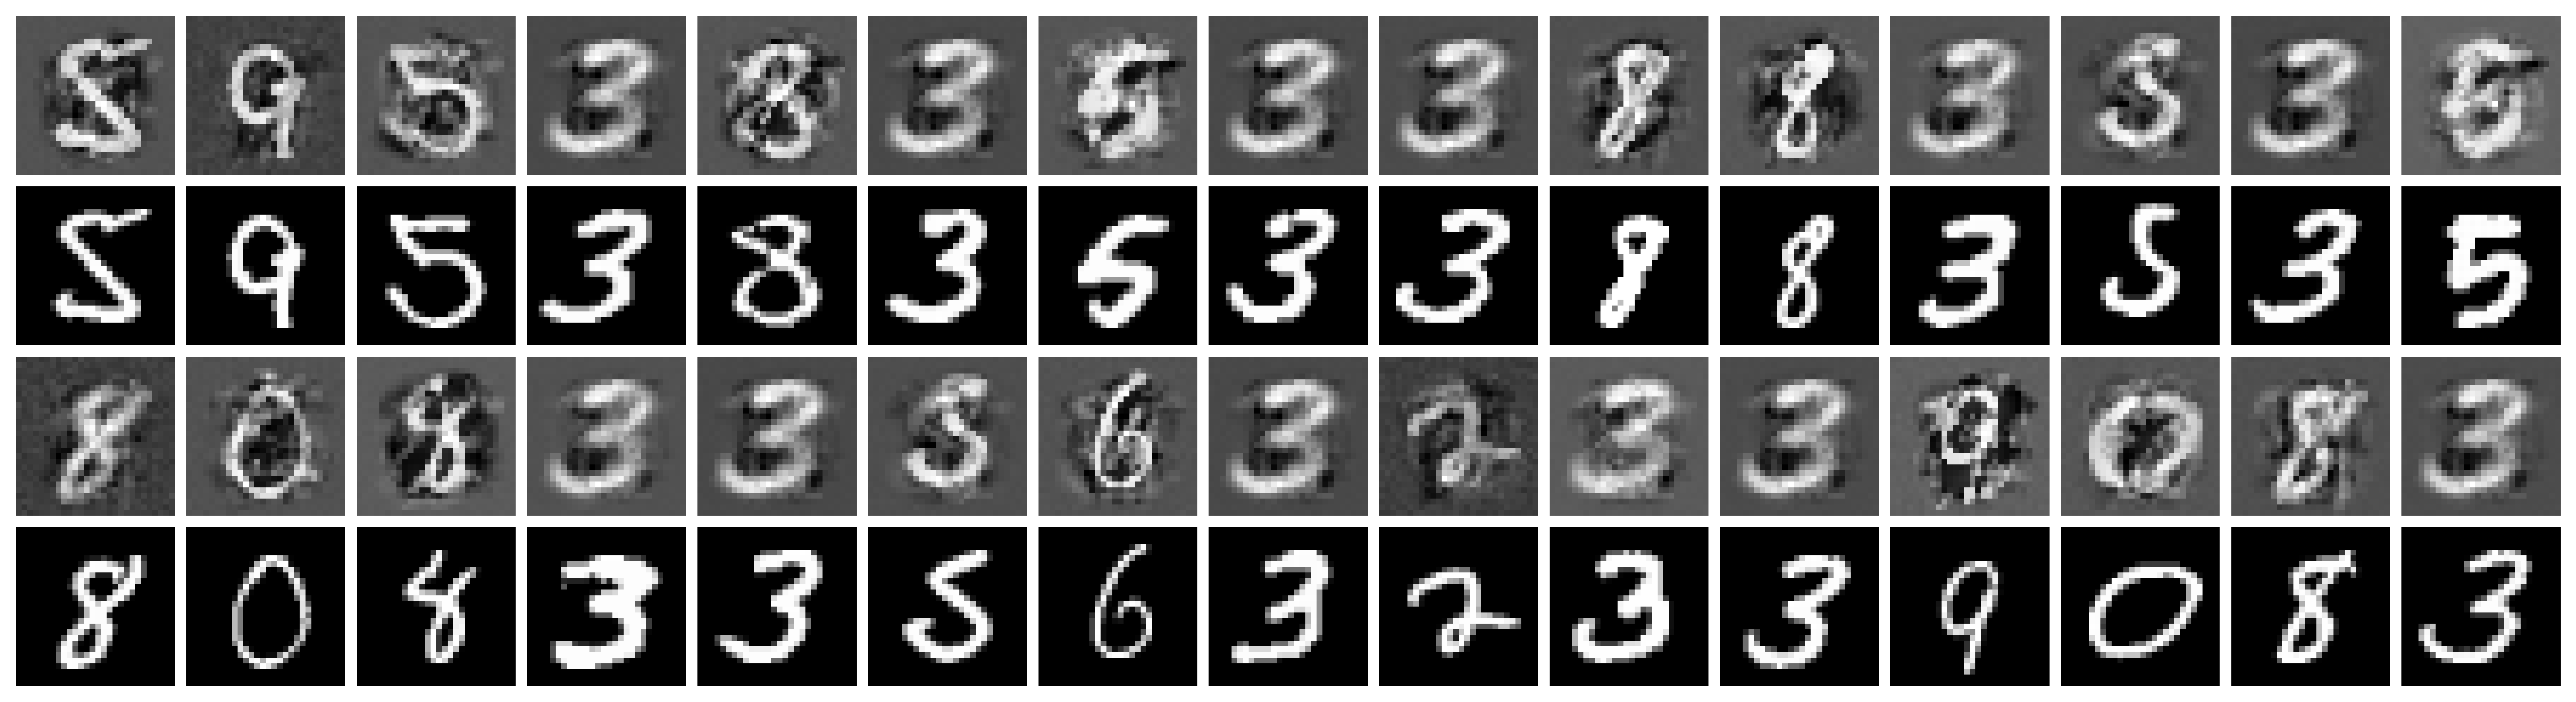

DONE!


In [7]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


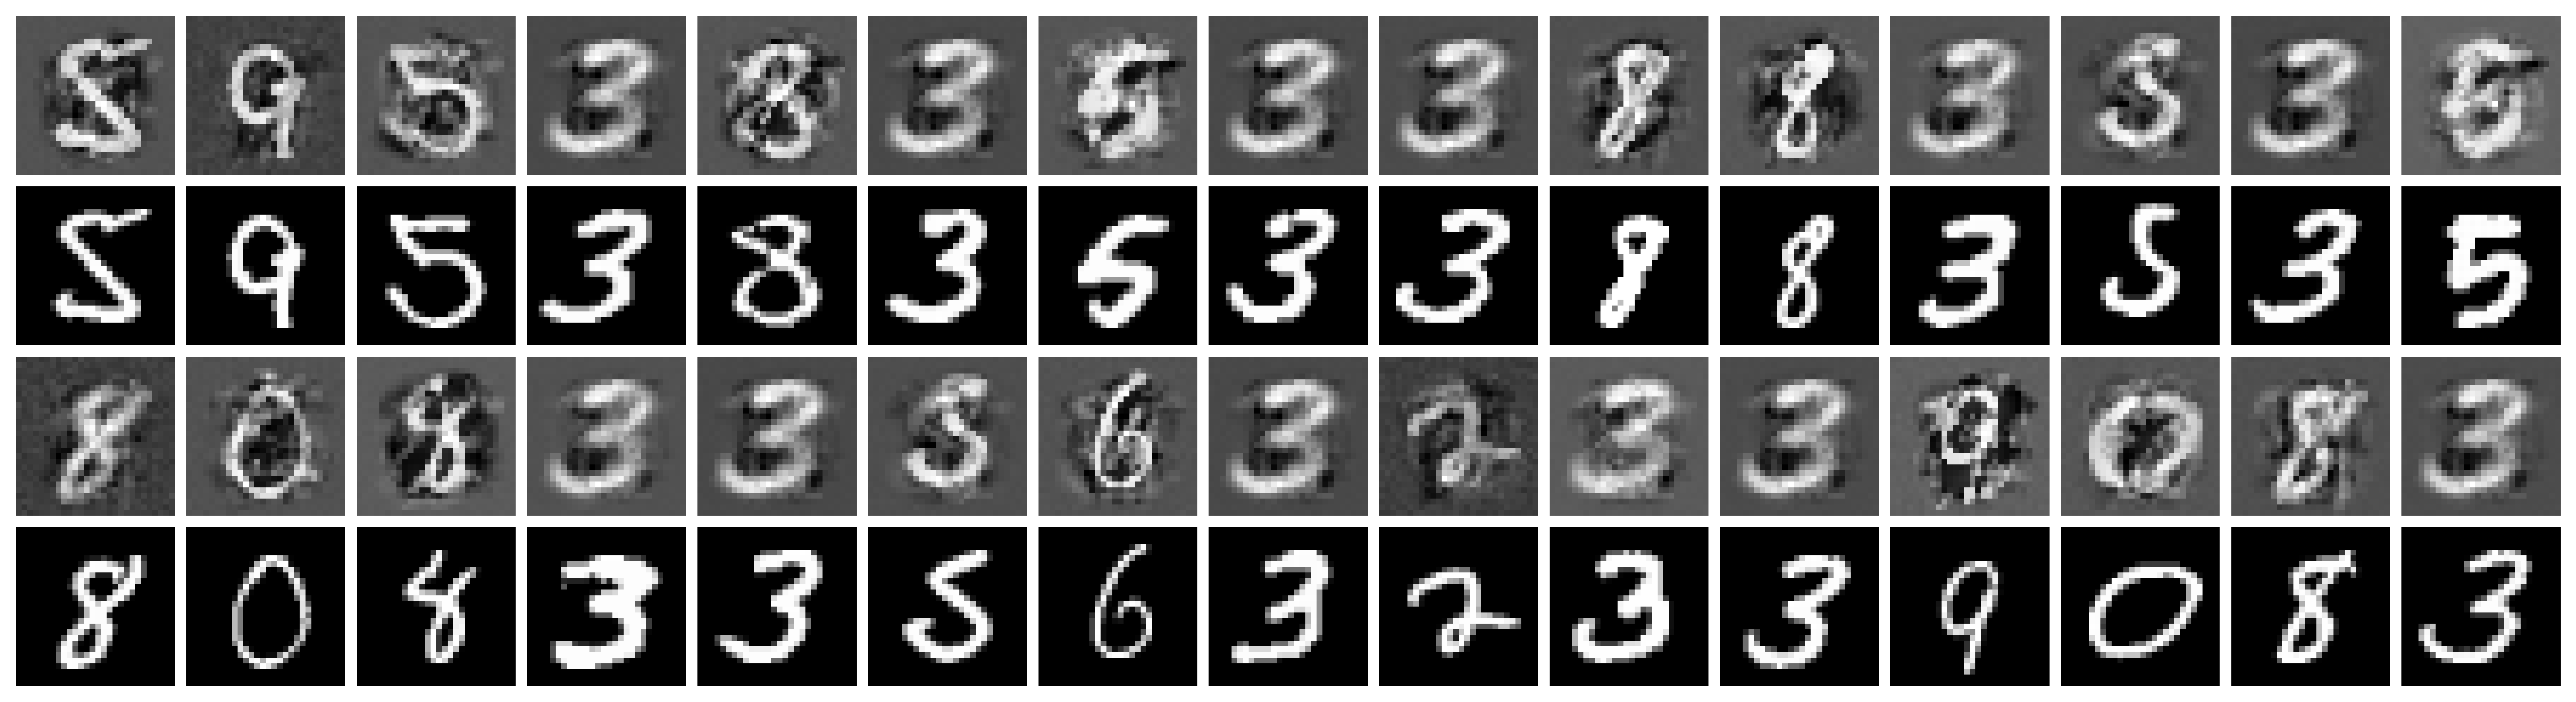

DONE!


In [8]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)

### Show Weights of first Layer

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


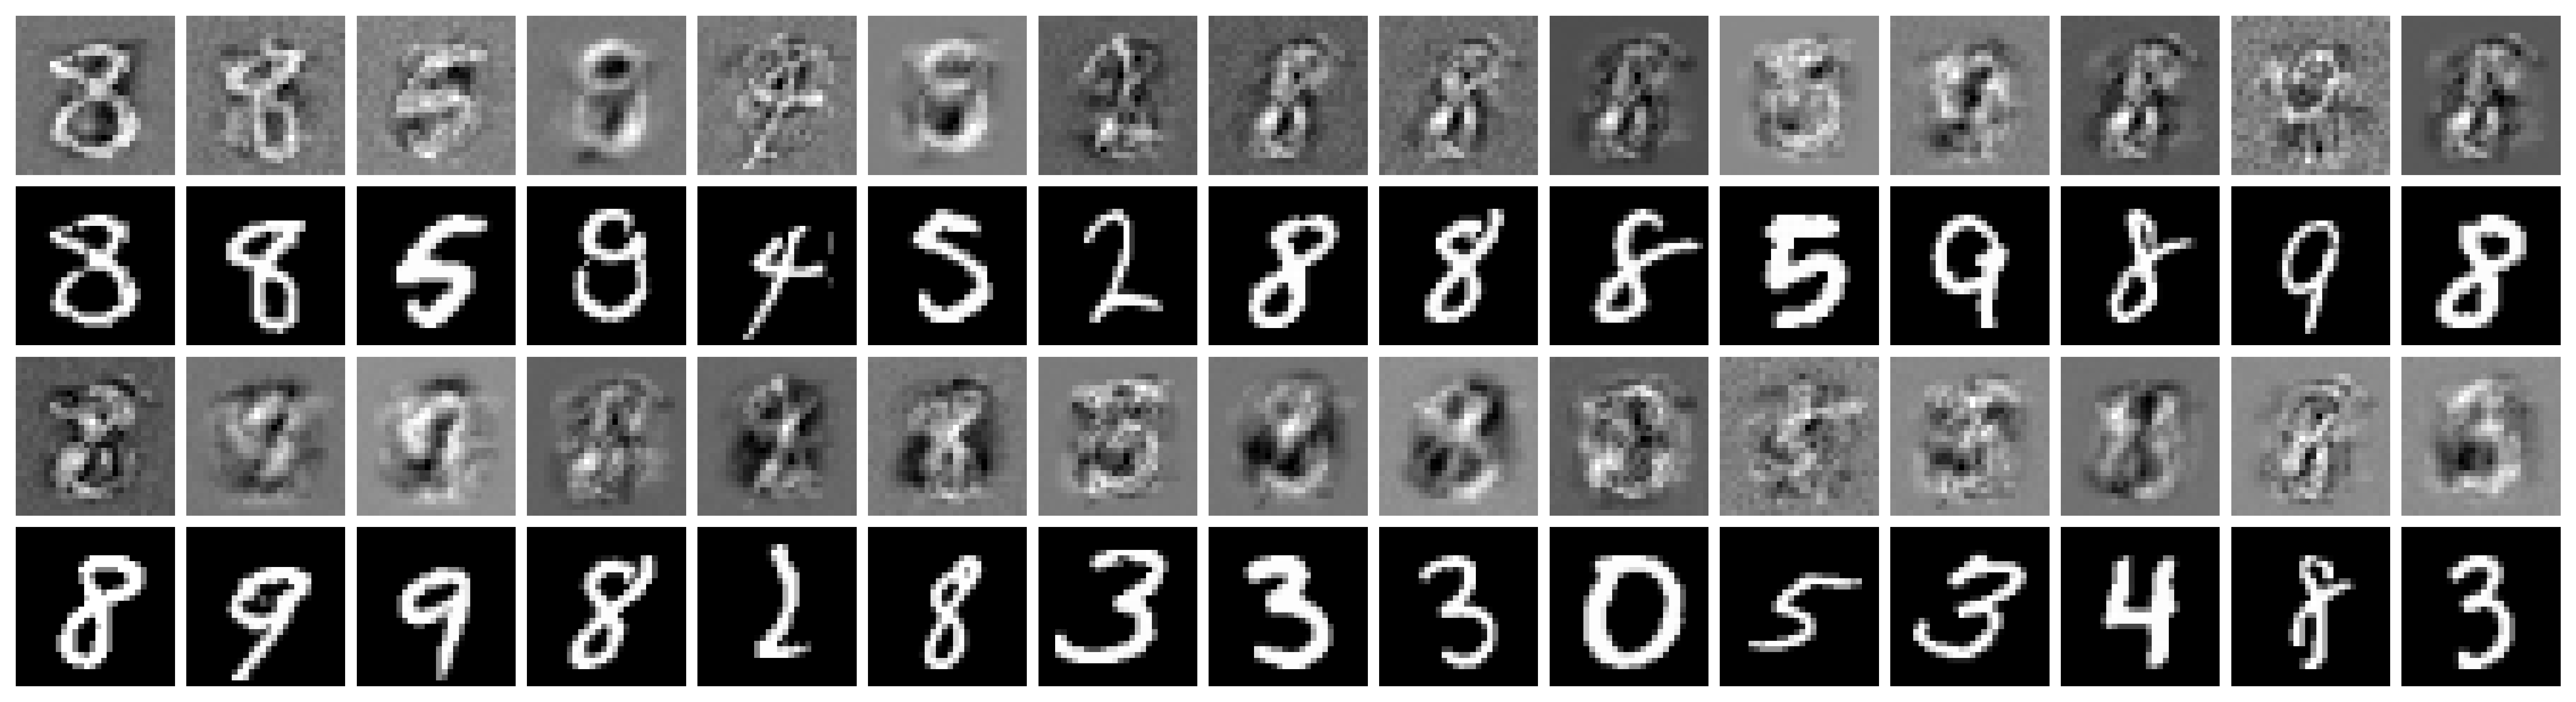

DONE!


In [9]:
# Show how the weights of the first layer looks like, for comparison.
# Note that some data samples can be found in the first layer, but not as near as many that can be reconstructed using our approach.

X = sweep.W.reshape(sweep.W.shape[0], 1, 28, 28)

# Find Nearest Neighbour
# xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='mean', use_bb=True, nn_threshold=1.1)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean, xx_add_ds_mean=False)
# Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
# Plot
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=None, figpath=None, show=True, dpi=100)


In [26]:
import pandas as pd

fer=pd.read_csv('/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013.csv')

In [27]:
fer.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [31]:
fer.columns.values

array(['emotion', ' Usage', ' pixels'], dtype=object)

In [32]:
fer.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [37]:
fer[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)